In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [110]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
pd.set_option('max_columns', None)

In [111]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [113]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [114]:
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

# Replacing Null Values

In [115]:
numeric_cols = train_df.dtypes[train_df.dtypes == 'float64'].index.tolist()
for col in numeric_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mean())
    test_df[col] = test_df[col].fillna(test_df[col].mean())
obj_cols = train_df.dtypes[train_df.dtypes == 'object'].index.tolist()
for col in obj_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [116]:
train_df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [117]:
test_df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [118]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


# Exploratory Data Analysis

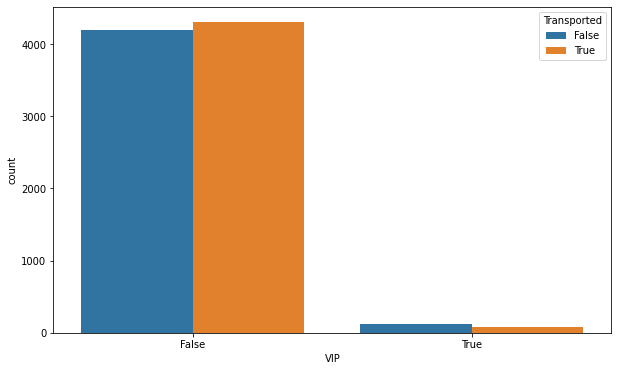

In [119]:
plt.figure(figsize = (10,6))
sns.countplot(data = train_df, x = 'VIP', hue = 'Transported');

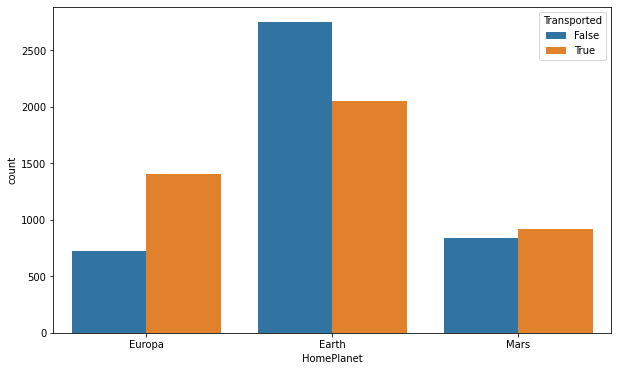

In [120]:
plt.figure(figsize = (10,6))
sns.countplot(data = train_df, x = 'HomePlanet', hue = 'Transported');

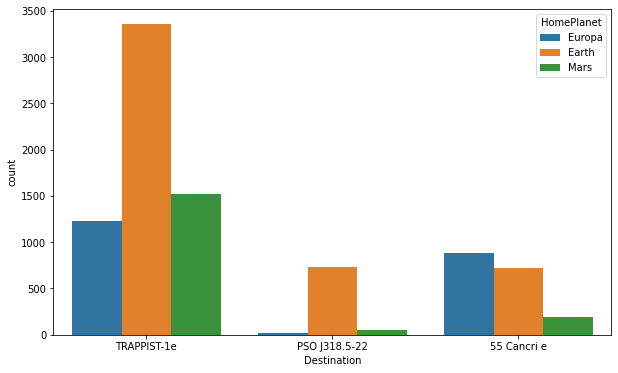

In [121]:
plt.figure(figsize = (10,6))
sns.countplot(data = train_df, x = 'Destination', hue = 'HomePlanet');

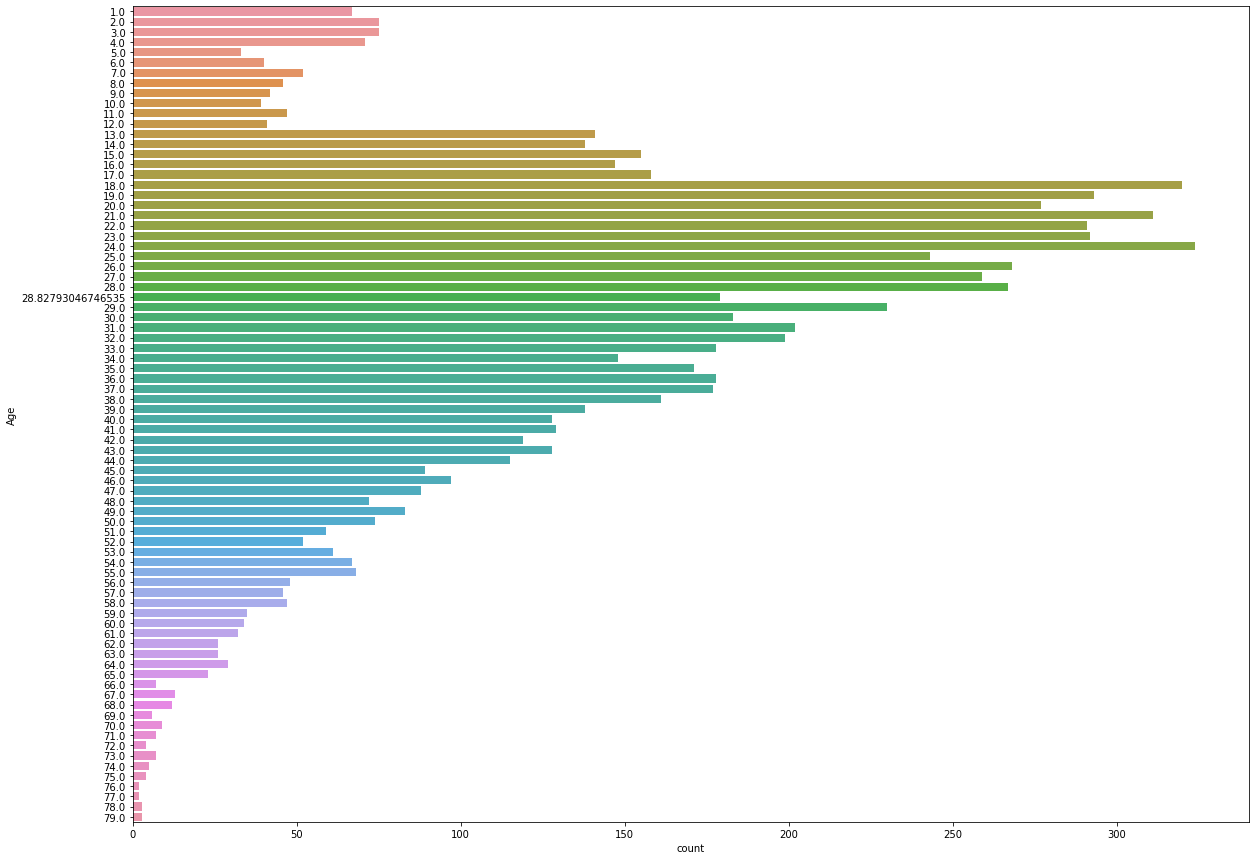

In [122]:
# Dropping Age == 0
to_drop = train_df.query('Age == 0').index
train_df = train_df.drop(to_drop, axis = 0).reset_index(drop = True)
test_age = test_df.query('Age == 0').index
test_df = test_df.drop(test_age, axis = 0).reset_index(drop = True)
plt.figure(figsize = (20,15))
sns.countplot(data = train_df, y = train_df['Age']);


# Checking for outliers


In [123]:
train_df.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


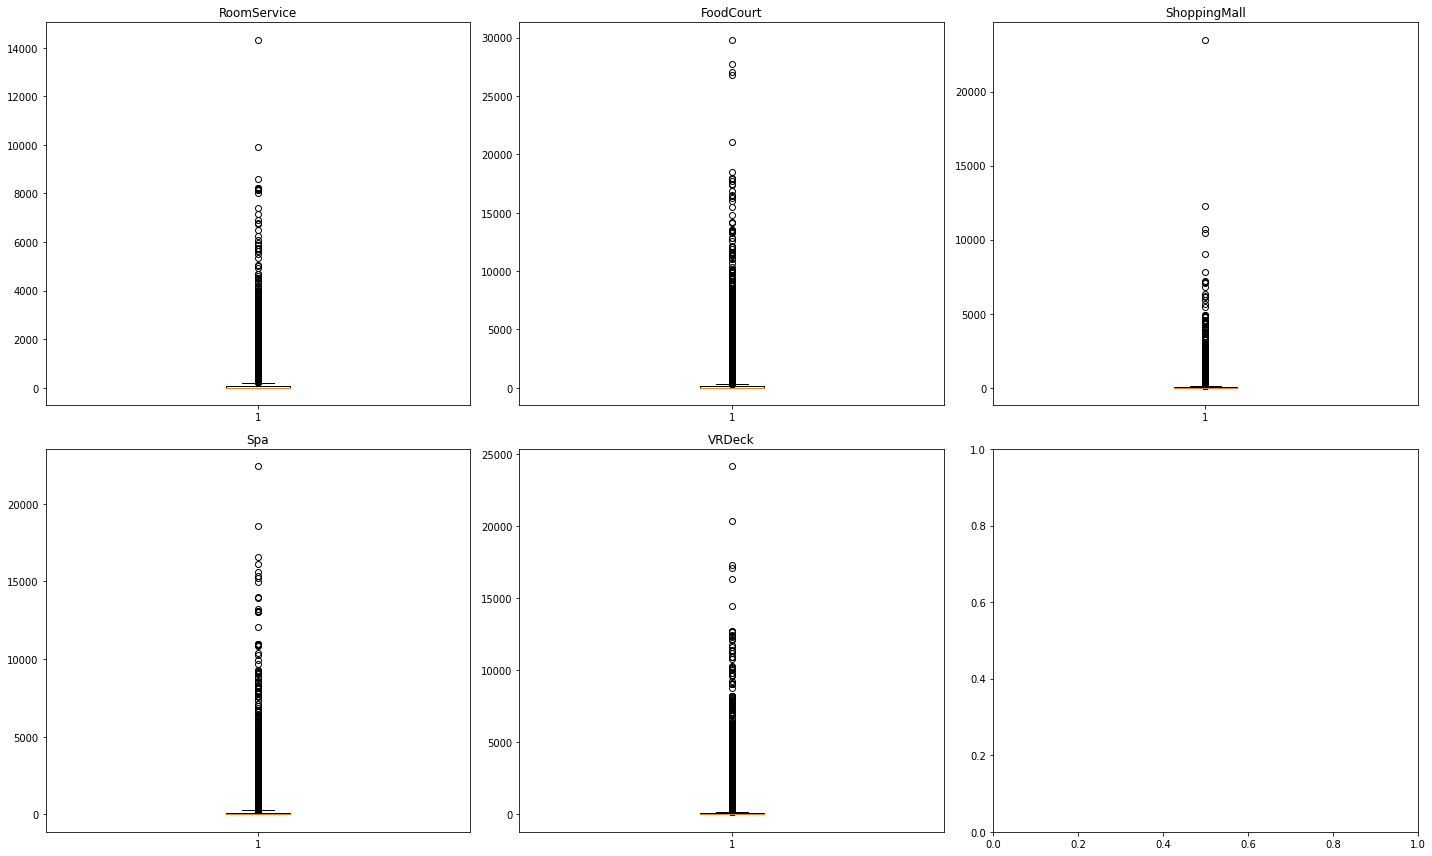

In [124]:
Boxplot_col = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck' ]
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.flatten()
for i, col in enumerate(Boxplot_col):
    data = train_df[col]
    axs[i].boxplot(data)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()


> **There are lot of outliers in our data that needed to be removed if not then it will decrease the accuracy of our Model**

> **We will try to normalize data using StandardScaler , if did not work will remove ouliers using IQR Method**

# Preprocessing

In [125]:
def preprocessing(df):
    df = df.copy()
    df = df.drop(['PassengerId', 'Cabin','Name'], axis = 1)
    if 'Transported' in df.columns:
        df['Transported'] = df['Transported'].replace({'False': 0, 'True': 1}).astype(int)
    else : pass
    bool_col = ['CryoSleep', 'VIP']
    for col in bool_col:
        df[col] = df[col].replace({'False' : 0, 'True' : 1}).astype(int)
    one_hot_cols = ['HomePlanet', 'Destination']
    for col in one_hot_cols:
        dummies = pd.get_dummies(df[col], prefix = col[0:3])
        df = pd.concat([df, dummies], axis = 1)
        df = df.drop(col, axis = 1)
    return df

In [126]:
train= preprocessing(train_df)
test = preprocessing(test_df)
train_label = train['Transported']
train = train.drop('Transported', axis = 1)
train_label_sam = train_label.sample(4195)

# Training

In [127]:
RFC = RandomForestClassifier(max_depth = 4)
RFC.fit(train, train_label)
print(f'Accuracy : {RFC.score(train, train_label)}')
pred = RFC.predict(test)


Accuracy : 0.769935408103347


In [128]:
GBC = GradientBoostingClassifier(max_depth = 3, n_estimators = 200)
GBC.fit(train, train_label)
print(f'Accuracy : {GBC.score(train, train_label)}')
pred2 = GBC.predict(test)

Accuracy : 0.8155020551967117


In [129]:
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
submission = submission.sample(4195)
submission['Transported']=pred2
submission['Transported']=np.where(pred2>0.5,True,False)
submission.to_csv('submission.csv', index = True)
submission

,PassengerId,Transported
3579,7795_02,True
2079,4504_01,False
992,2057_02,True
509,1081_01,True
2541,5564_01,True
...,...,...
122,0271_01,True
4263,9245_01,False
3659,7965_01,True
963,2016_01,True
